**Modelo de red neuronal SVR**

Este archivo consta de los codigos y conclusiones de:
* 1.Carga de librerias y datos
* 2.Series de tiempo
* 3.Normalizar Datos.
* 4.Preparar datos para realizar aprendizaje supervizado.
* 5.Modelo SVR
* 6.Evaluacion del modelo


#1.Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [11]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

# import the model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time, joblib

In [2]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [3]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


In [4]:
predictor_variables=pd.read_csv('predictor_variables.csv', index_col='dt')
target_variables=pd.read_csv('target_variables.csv', index_col='dt')
df=pd.read_csv('df_modelo.csv', index_col='dt')

In [5]:
predictor_variables.shape

(1439, 21)

In [6]:
#Setear semilla
np.random.seed(42)

#Exportar resultados

In [22]:
results_SVR=pd.read_csv('results_SVR_CE.csv')
results_SVR = results_SVR.sort_values(by='MSE', ascending=True)
results_SVR.head(5)


,Unnamed: 0,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
354,354,SVR_rbf_0.8772346347728702_0.5398462768583149_...,71,5,0.035124,0.348409,1.714970,0.590262,0.433681
344,344,SVR_rbf_0.8913495971886025_0.5341145467857797_...,69,5,0.035171,0.348436,1.714580,0.590285,0.433701
374,374,SVR_rbf_0.7974364176322617_0.5544894024977772_...,75,5,0.033814,0.348619,1.732445,0.590440,0.433526
369,369,SVR_rbf_0.8157675897302965_0.5433572936467199_...,74,5,0.034230,0.348690,1.722422,0.590500,0.433344
464,464,SVR_rbf_0.7612560431507306_0.5693187506697562_...,93,5,0.031291,0.349585,1.759451,0.591257,0.434633


In [23]:
nombre_archivo=results_SVR['nameModel'].iloc[0]
nombre_archivo

'SVR_rbf_0.8772346347728702_0.5398462768583149_scale'

In [24]:
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos-2/result_SVR/'
modelo=carpeta_destino+nombre_archivo+"."+"pkl"
load_model = joblib.load(modelo) # Carga del modelo.


# Generar Narmax data


In [25]:
def narmax_data(data,modelo,predictor,retrasos):
  #Se realiza prediccion
  predictor= np.array(predictor)
  results = modelo.predict(predictor)
  target = np.array(target_variables)
  error=[]
  aux=0
  for prediccion, real in zip(results,target):
    aux=real-prediccion
    error.append(aux[0])

  df_narmax = data.iloc[retrasos:]
  # Agregamos el arreglo como nueva columna en el DataFrame
  df_narmax['error'] = error

  return df_narmax

In [26]:
df=narmax_data(df,load_model,predictor_variables,3)
df

,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,error
dt,,,,,,,,
2006-12-19,0.165544,0.181727,-0.526763,0.566945,-0.478415,2.753617,-0.799143,-0.177551
2006-12-20,1.085635,1.062706,-0.327783,0.717836,-1.006562,0.380121,1.263615,0.313489
2006-12-21,0.249270,0.239930,-0.660841,0.099227,0.104498,0.368143,0.308547,-0.095507
2006-12-22,1.275703,1.294563,0.184862,0.168754,0.976980,-0.720867,0.494736,1.150968
2006-12-23,5.274789,5.385178,0.868785,-0.343654,0.673563,-0.684934,1.437479,4.119312
...,...,...,...,...,...,...,...,...
2010-11-22,0.782730,0.803613,-0.696695,-0.313822,2.049641,0.122362,0.233810,1.060898
2010-11-23,0.019761,0.037690,-0.793731,-0.128886,0.171225,-0.669123,-0.428340,-0.673191
2010-11-24,0.379396,0.366498,-0.892469,-0.395024,-0.316634,0.475942,0.781361,-0.159929


#2.Normalizar base de datos

El **método de puntuación z** (a menudo llamado estandarización ) transforma los datos en una distribución con una media de 0 y una desviación estándar de 1 . Cada valor estandarizado se calcula restando la media de la característica correspondiente y luego dividiendo por la desviación estándar.

In [27]:
#Seleccion de caracteristicas
features =df.columns

#Se define escalado
std_scaler = StandardScaler()

#Transformacion

for i in features:
  df[i] = std_scaler.fit_transform(df[i].values.reshape(-1,1))

df.head()

,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,error
dt,,,,,,,,
2006-12-19,0.173340,0.190020,-0.526829,0.565698,-0.478860,2.753152,-0.797306,-0.263254
2006-12-20,1.102791,1.080676,-0.327918,0.716707,-1.006678,0.380983,1.268975,0.502559
2006-12-21,0.257918,0.248862,-0.660861,0.097620,0.103690,0.369012,0.312276,-0.135301
2006-12-22,1.294792,1.315080,0.184553,0.167200,0.975627,-0.719389,0.498782,1.808668
2006-12-23,5.334560,5.450628,0.868243,-0.345603,0.672399,-0.683476,1.443135,6.438021


#3.Preparar datos para realizar aprendizaje supervizado.

La idea es modelar cada valor en función de los valores recientes anteriores, dado un retardo de tiempo dado. **Los valores futuros de una variable en una serie de tiempo dependen de sus propios rezagos y de los rezagos de otras variables.**

In [28]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Incrustación de retardo de tiempo
    :param series: serie de tiempo como objeto de pandas
    :param n_lags: número de valores pasados para usar como variables explicativas
    :param horizon: horizonte de pronostico
    :return:pd.DataFrame con series temporales reconstruidas
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    serie_time_delay = [series.shift(i) for i in n_lags_iter]
    serie_time_delay = pd.concat(serie_time_delay, axis=1).dropna()
    serie_time_delay.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return serie_time_delay

In [29]:
serie_split = []
for columna in df:
  col_df = time_delay_embedding(
      df[columna], #Serie de tiempo
      n_lags=3, #Numero de retrasos
      horizon=1 # Horizonte de prediccion
      )
  serie_split.append(col_df)

In [30]:
serie_df = pd.concat(serie_split, axis=1).dropna()
serie_df.head()

,Global_active_power(t-2),Global_active_power(t-1),Global_active_power(t-0),Global_active_power(t+1),Global_intensity(t-2),Global_intensity(t-1),Global_intensity(t-0),Global_intensity(t+1),Global_reactive_power(t-2),Global_reactive_power(t-1),...,Sub_metering_2(t-0),Sub_metering_2(t+1),Sub_metering_3(t-2),Sub_metering_3(t-1),Sub_metering_3(t-0),Sub_metering_3(t+1),error(t-2),error(t-1),error(t-0),error(t+1)
dt,,,,,,,,,,,,,,,,,,,,,
2006-12-22,0.173340,1.102791,0.257918,1.294792,0.190020,1.080676,0.248862,1.315080,-0.526829,-0.327918,...,0.369012,-0.719389,-0.797306,1.268975,0.312276,0.498782,-0.263254,0.502559,-0.135301,1.808668
2006-12-23,1.102791,0.257918,1.294792,5.334560,1.080676,0.248862,1.315080,5.450628,-0.327918,-0.660861,...,-0.719389,-0.683476,1.268975,0.312276,0.498782,1.443135,0.502559,-0.135301,1.808668,6.438021
2006-12-24,0.257918,1.294792,5.334560,1.641411,0.248862,1.315080,5.450628,1.758682,-0.660861,0.184553,...,-0.683476,1.546477,0.312276,0.498782,1.443135,-0.615003,-0.135301,1.808668,6.438021,1.039105
2006-12-25,1.294792,5.334560,1.641411,1.962175,1.315080,5.450628,1.758682,1.938499,0.184553,0.868243,...,1.546477,0.052500,0.498782,1.443135,-0.615003,-0.902906,1.808668,6.438021,1.039105,2.584339
2006-12-26,5.334560,1.641411,1.962175,3.940476,5.450628,1.758682,1.938499,3.901554,0.868243,-0.547440,...,0.052500,0.325917,1.443135,-0.615003,-0.902906,1.509595,6.438021,1.039105,2.584339,5.319913


In [31]:
predictor_variables = serie_df.columns.str.contains('\(t\-')
target_variables = serie_df.columns.str.contains('Global_active_power\(t\+')

In [32]:
predictor_variables = serie_df.iloc[:, predictor_variables]
target_variables = serie_df.iloc[:, target_variables]

In [33]:
predictor_variables.head()

,Global_active_power(t-2),Global_active_power(t-1),Global_active_power(t-0),Global_intensity(t-2),Global_intensity(t-1),Global_intensity(t-0),Global_reactive_power(t-2),Global_reactive_power(t-1),Global_reactive_power(t-0),Voltage(t-2),...,Sub_metering_1(t-0),Sub_metering_2(t-2),Sub_metering_2(t-1),Sub_metering_2(t-0),Sub_metering_3(t-2),Sub_metering_3(t-1),Sub_metering_3(t-0),error(t-2),error(t-1),error(t-0)
dt,,,,,,,,,,,,,,,,,,,,,
2006-12-22,0.173340,1.102791,0.257918,0.190020,1.080676,0.248862,-0.526829,-0.327918,-0.660861,0.565698,...,0.103690,2.753152,0.380983,0.369012,-0.797306,1.268975,0.312276,-0.263254,0.502559,-0.135301
2006-12-23,1.102791,0.257918,1.294792,1.080676,0.248862,1.315080,-0.327918,-0.660861,0.184553,0.716707,...,0.975627,0.380983,0.369012,-0.719389,1.268975,0.312276,0.498782,0.502559,-0.135301,1.808668
2006-12-24,0.257918,1.294792,5.334560,0.248862,1.315080,5.450628,-0.660861,0.184553,0.868243,0.097620,...,0.672399,0.369012,-0.719389,-0.683476,0.312276,0.498782,1.443135,-0.135301,1.808668,6.438021
2006-12-25,1.294792,5.334560,1.641411,1.315080,5.450628,1.758682,0.184553,0.868243,-0.547440,0.167200,...,0.064685,-0.719389,-0.683476,1.546477,0.498782,1.443135,-0.615003,1.808668,6.438021,1.039105
2006-12-26,5.334560,1.641411,1.962175,5.450628,1.758682,1.938499,0.868243,-0.547440,1.240312,-0.345603,...,3.157986,-0.683476,1.546477,0.052500,1.443135,-0.615003,-0.902906,6.438021,1.039105,2.584339


In [34]:
target_variables.head()

,Global_active_power(t+1)
dt,
2006-12-22,1.294792
2006-12-23,5.334560
2006-12-24,1.641411
2006-12-25,1.962175
2006-12-26,3.940476


In [37]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %30 de la data para test
X_train, X_test, Y_train, Y_test = train_test_split(predictor_variables, target_variables, test_size=0.2, shuffle=False)

shape=len(X_train.columns)

print("Separacion de datos terminada!")

Separacion de datos terminada!


In [36]:
X_train.shape

(1005, 24)

#5.SVR

In [38]:
# Definir la función objetivo
def objective(params):

    # Definir los hiperparámetros a optimizar
    kernel = params['kernel']
    gamma = params['gamma']
    C = float(params['C'])
    epsilon  = float(params['epsilon'])

    tscv = TimeSeriesSplit(n_splits=5)

    scores_mse = []
    scores_rmse = []
    scores_mae= []
    scores_mape= []
    times=[]

    #Validacion cruzada
    for train_index, test_index in tscv.split(X_train):
      X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_, y_test_ = Y_train.iloc[train_index], Y_train.iloc[test_index]

      model_SVR = SVR(kernel = kernel, gamma =gamma, C =C, epsilon =epsilon )

      #Entrenamiento
      start = time.time()
      model_SVR.fit(X_train_, y_train_)
      end = time.time()

      #Evaluacion del modelo
      y_pred = model_SVR.predict(X_test)
      score_mse = mse(Y_test, y_pred)
      rmse = np.sqrt(score_mse)  # Calcular el RMSE
      score_mae = mae(Y_test, y_pred)
      score_mape= mape(Y_test, y_pred)


      scores_mse.append(score_mse)
      scores_mae.append(score_mae)
      scores_mape.append(score_mape)
      scores_rmse.append(rmse)

      #Tiempo de la validadion cruzada
      time_val= end- start
      times.append(time_val)

    return {'loss': np.mean(score_mse),
            'status': STATUS_OK,
            'model': model_SVR,
            'params': params,
            'time':times,
            'scores_mse': scores_mse,
            'scores_mae': scores_mae,
            'scores_mape': scores_mape,
            'scores_rmse': scores_rmse
            }

In [39]:
# Definir el espacio de búsqueda de hiperparámetros
space = {
    'kernel':hp.choice('kernel',['poly', 'rbf', 'sigmoid', 'linear']),
    'gamma': hp.choice('gamma', ['scale', 'auto'],),
    'C': hp.uniform('C', 0.1, 1),
    'epsilon': hp.uniform('epsilon', 0.1, 0.9),
}

In [40]:
#Optimización bayesiana
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Los mejores hiperparámetros son: ", best)

100%|██████████| 100/100 [00:21<00:00,  4.59trial/s, best loss: 0.3277483594324231]
Los mejores hiperparámetros son:  {'C': 0.2770928891667469, 'epsilon': 0.10258949338133953, 'gamma': 1, 'kernel': 1}


In [41]:
#Obtener el valor de la función objetivo del mejor ensayo
best_trial = trials.best_trial
best_model = best_trial['result']['model']

In [42]:
# Obtener una lista de los resultados de todas las evaluaciones
all_results = [trial['result'] for trial in trials]

In [43]:
# Mejores hiperparámetros encontrados
best_params = space_eval(space, best)
best_params

{'C': 0.2770928891667469,
 'epsilon': 0.10258949338133953,
 'gamma': 'auto',
 'kernel': 'rbf'}

In [44]:
#Se realiza prediccion
results = best_model.predict(X_test)

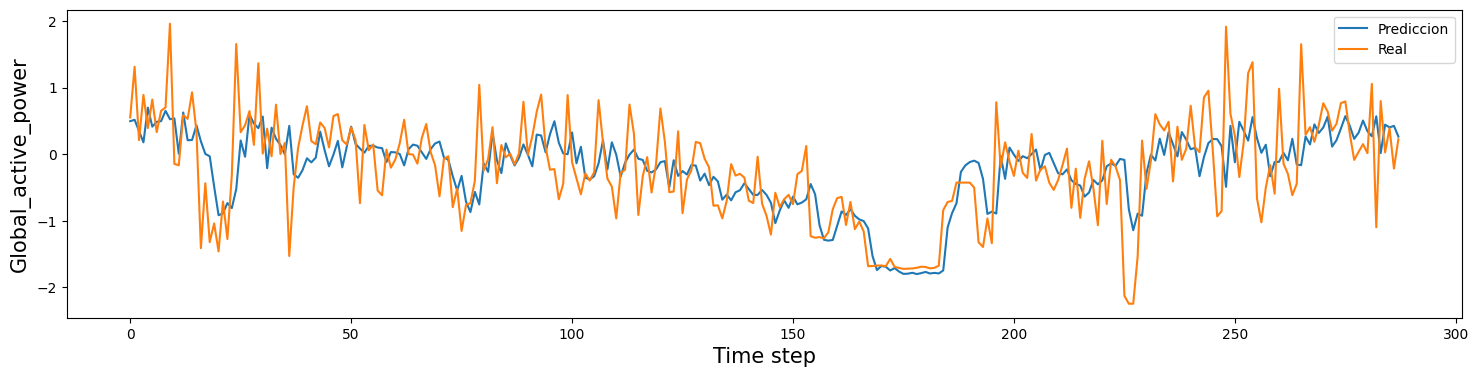

In [45]:
#Grafico de prediccion con el valor real
tiempo=[x for x in range(Y_test.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tiempo,results)
plt.ylabel('Global_active_power', size=15)
plt.plot(tiempo,Y_test)
plt.xlabel('Time step', size=15)
plt.legend(['Prediccion','Real'])
plt.show()

#Exportar resultados

Se guardan los resultados la optimizacion bayesiana

In [46]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los parametros para exportalos a un csv
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  for time,score_mse,score_mae,score_mape,score_rmse in zip(result['time'],result['scores_mse'],result['scores_rmse'],result['scores_mae'],result['scores_mape']):
    k+=1
    nameModel = "Narmax_SVR" + "_"+str(result['params']['kernel'])+"_"+str(result['params']['C'])+"_"+str(result['params']['epsilon'])+"_"+str(result['params']['gamma'])
    results.append([nameModel,trial,k,time,score_mse,score_rmse,score_mae,score_mape])

In [47]:
#Se crea dataframe
results_csv=pd.DataFrame(results,columns=['nameModel','trial_optimizacion_bayesiana','Step_validacion','time','MSE','RMSE','MAE','MAPE'])

results_o = results_csv.sort_values(by='MSE', ascending=True)
results_o.head(5)

,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
499,Narmax_SVR_rbf_0.2770928891667469_0.1025894933...,100,5,0.051742,0.327748,2.625833,0.572493,0.408803
104,Narmax_SVR_rbf_0.3496915080713324_0.1012059609...,21,5,0.053815,0.329455,1.834261,0.573981,0.411237
129,Narmax_SVR_rbf_0.33725004803371594_0.150296624...,26,5,0.050316,0.329767,1.936130,0.574254,0.408710
384,Narmax_SVR_rbf_0.35943562993040684_0.410112170...,77,5,0.043721,0.330374,2.405198,0.574781,0.417462
159,Narmax_SVR_rbf_0.4478945971593214_0.4584764985...,32,5,0.033981,0.330394,2.630901,0.574799,0.420378


In [48]:
# Exportar el DataFrame como CSV
results_csv.to_csv('Narmax_results_SVR_CE.csv')

In [49]:
import os
# Ruta de la carpeta que deseas crear
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos-2/Narmax_result_SVR'

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta_destino):
    # Crear la carpeta si no existe
    os.makedirs(carpeta_destino)

In [50]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los modelos para exportalos a un Json
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  i=0

  nameModel = "Narmax_SVR" + "_"+str(result['params']['kernel'])+"_"+str(result['params']['C'])+"_"+str(result['params']['epsilon'])+"_"+str(result['params']['gamma'])
  ruta = os.path.join(carpeta_destino, nameModel + ".pkl")
  joblib.dump(result['model'], ruta)
